In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
movies_data = pd.read_csv('my_movies.csv')
movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [46]:
movies_data.shape

(10, 15)

In [47]:
movies_data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [48]:
movies_data.drop(labels=['V1','V2','V3','V4','V5'],axis=1,inplace=True)

In [50]:
movies_data.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [49]:
movies_data.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

#### 1) For support value = 0.09 and confidence value = 0.1 and maximum value of item sets = 2

In [17]:
from mlxtend.frequent_patterns import apriori,association_rules

In [51]:
frequent_items_set = apriori(df=movies_data,min_support=0.09,use_colnames=True,max_len=2)
frequent_items_set.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [52]:
association_rules = association_rules(df=frequent_items_set,metric = 'confidence',min_threshold=0.1)

In [53]:
association_rules.shape

(40, 9)

In [54]:
association_rules.sort_values(by='lift',ascending=False,inplace=True)
association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
38,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
31,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf


##### Observations:
Total 40 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:
* Green Mile and LOTR are most likely to be watched together than just watching Green Mile alone.
* LOTR and Green Mile are most likely to be watched together than just watching LOTR alone.
* LOTR1 and LOTR2 are most likely to be watched together than just watching LOTR1 alone.
* LOTR2 and LOTR1 are most likely to be watched together than just watching LOTR2 alone.
* Harry Potter2 and Harry Potter1 are most likely to be watched together than just watching Harry 
  Potter2 alone.

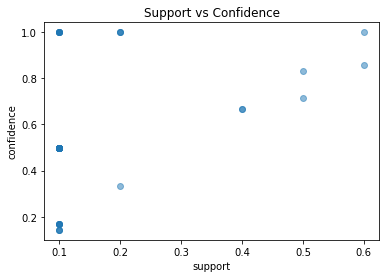

In [55]:
plt.scatter(association_rules['support'],association_rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

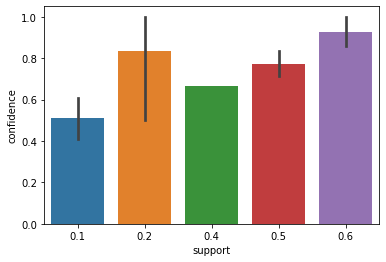

In [56]:
sns.barplot(x='support',y='confidence',data=association_rules)

#### 2) For support value = 0.1 and confidence = 0.2,maximum length  = 5

In [57]:
frequent_items_set1 = apriori(df=movies_data,min_support=0.1,use_colnames=True,max_len=5)
frequent_items_set1.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [58]:
from mlxtend.frequent_patterns import apriori,association_rules
association_rules1 = association_rules(df=frequent_items_set1,metric = 'confidence',min_threshold=0.2)
association_rules1.sort_values(by='lift',ascending=False,inplace=True)
association_rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
186,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
183,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
197,"(Green Mile, LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
171,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
118,"(LOTR, Sixth Sense)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [59]:
association_rules1.shape

(220, 9)

#### Observations:
Total 220 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:
* (Harry Potter1, LOTR1) and (Green Mile, LOTR2) are most likely to be watched together than just 
  watching (Green Mile, LOTR2) alone.
* (Green Mile, LOTR1) and (Harry Potter1, LOTR2) are most likely to be watched together than just 
  watching (Harry Potter1, LOTR2) alone.
* (Green Mile, LOTR2, Harry Potter1) and (Sixth Sense, LOTR1) are most likely to be watched 
  together than just watching (Sixth Sense, LOTR1) alone.
* (Sixth Sense, LOTR2) and (Green Mile, Harry Potter1) are most likely to be watched together 
  than just watching (Green Mile, Harry Potter1) alone.
* (LOTR, Sixth Sense) and (Green Mile, Gladiator) are most likely to be watched together than 
  just watching (Green Mile, Gladiator) alone.

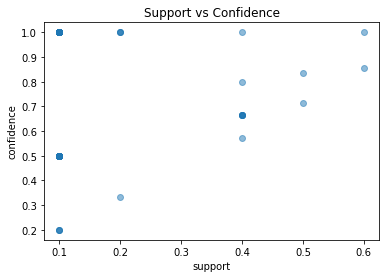

In [60]:
plt.scatter(association_rules1['support'],association_rules1['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

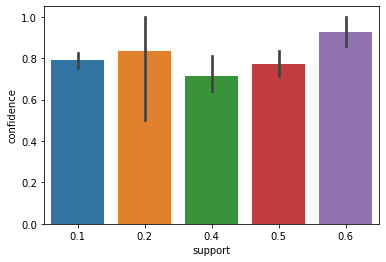

In [61]:
sns.barplot(x='support',y='confidence',data=association_rules1)

#### 3) For support value = 0.05 and confidence value = 0.5 and maximum length of item sets = 3

In [63]:
frequent_items_set2 = apriori(df=movies_data,min_support=0.05,use_colnames=True,max_len=3)
frequent_items_set2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [64]:
from mlxtend.frequent_patterns import apriori,association_rules
association_rules2 = association_rules(df=frequent_items_set2,metric = 'confidence',min_threshold=0.5)
association_rules2.sort_values(by='lift',ascending=False,inplace=True)
association_rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
83,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
47,(LOTR1),"(Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
48,"(Sixth Sense, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
82,"(LOTR, Gladiator)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [65]:
association_rules2.shape

(110, 9)

##### Observations:
Total 110 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:
* (LOTR) and (Green Mile, Gladiator) are most likely to be watched together than just watching 
  (Green Mile, Gladiator) alone.
* (Green Mile, Gladiator) and (LOTR) are most likely to be watched together than just watching 
  LOTR alone.
* (LOTR1) and (Harry Potter1, Sixth Sense) are most likely to be watched together than just 
  watching (Harry Potter1, Sixth Sense) alone.
* (Sixth Sense, LOTR2) and (LOTR1) are most likely to be watched together than just watching 
  (LOTR1) alone.
* (LOTR, Gladiator) and (Green Mile ) are most likely to be watched together than just watching (Green Mile) alone.

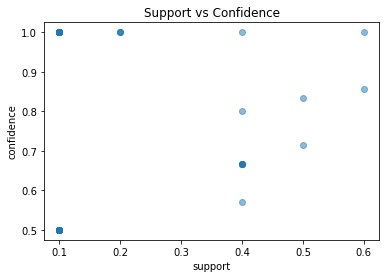

In [66]:
plt.scatter(association_rules2['support'],association_rules2['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

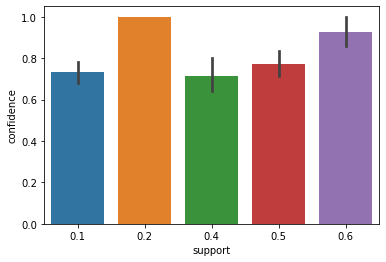

In [67]:
sns.barplot(x='support',y='confidence',data=association_rules2)

#### 4) For support value = 0.02 and confidence value = 0.7 and maximum length of item sets = 10

In [68]:
frequent_items_set3 = apriori(df=movies_data,min_support=0.02,use_colnames=True,max_len=10)
frequent_items_set3.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [69]:
from mlxtend.frequent_patterns import apriori,association_rules
association_rules3 = association_rules(df=frequent_items_set3,metric = 'confidence',min_threshold=0.7)
association_rules3.sort_values(by='lift',ascending=False,inplace=True)
association_rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
86,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
113,"(Green Mile, Sixth Sense, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
84,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
112,"(Green Mile, LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [70]:
association_rules3.shape

(129, 9)

##### Observations:
Total 129 association rules have been ruled out. The top 5 association rules with highest lift values states as follows:

* (Harry Potter1, Sixth Sense) and (Green Mile, LOTR2, LOTR1) are most likely to be watched together than just watching
  (Green Mile, LOTR2, LOTR1)alone.
* (Sixth Sense, LOTR2) and (Green Mile, LOTR1) are most likely to be watched together than just watching (Green Mile, 
  LOTR1)alone.
* (Green Mile, Sixth Sense, LOTR2) and (Harry Potter1, LOTR1) are most likely to be watched together than just watching  
  (Harry Potter1, LOTR1) alone.
* (Green Mile, LOTR2) and (Sixth Sense, LOTR1) are most likely to be watched together than just watching (Sixth Sense, 
  LOTR1) alone.
* (Green Mile, LOTR2, Harry Potter1) and (Sixth Sense, LOTR1) are most likely to be watched together than just watching (G
  (Sixth Sense, LOTR1) alone.

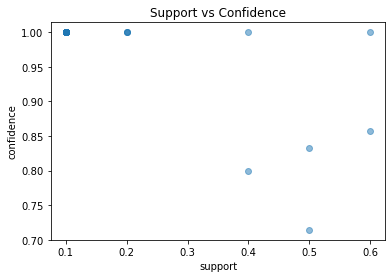

In [71]:
plt.scatter(association_rules3['support'],association_rules3['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

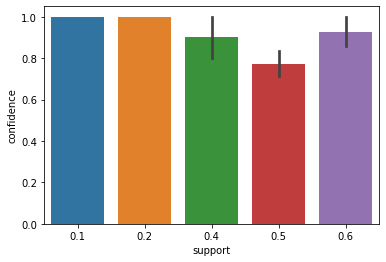

In [72]:
sns.barplot(x='support',y='confidence',data=association_rules3)